In [1]:
import pandas as pd

## Chargement du dataset

Lecture du dataset

In [2]:
df = pd.read_csv('./datasets/mall_customers.csv');

Prevoir la structure du dataset

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Voir le nombre de ligne

In [4]:
df.shape

(200, 5)

## Nettoyage et prétraitement

Verifier s'il y a des valeurs manquantes


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Effacement des colonnes irrelevant

In [6]:
df = df.drop(['CustomerID'], axis=1)

Standarization des variables quantitatives

In [7]:
# from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

# df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]);

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Analyse exploratoire des données (EDA)

C'est le processus d'analyse et de visualisation d'un ensemble de données afin de résumer ses principales caractéristiques, de détecter des modèles et de découvrir des idées avant d'appliquer des modèles d'apprentissage automatique (comme le clustering). Elle vous aide à comprendre vos données et à prendre des décisions éclairées en matière de prétraitement et de modélisation.

### EDA univariée

Histogrammes et boxplots de chaque variable

<Axes: >

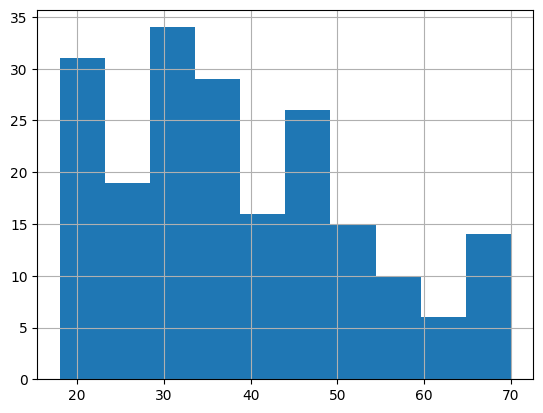

In [9]:
df['Age'].hist()

<Axes: ylabel='Age'>

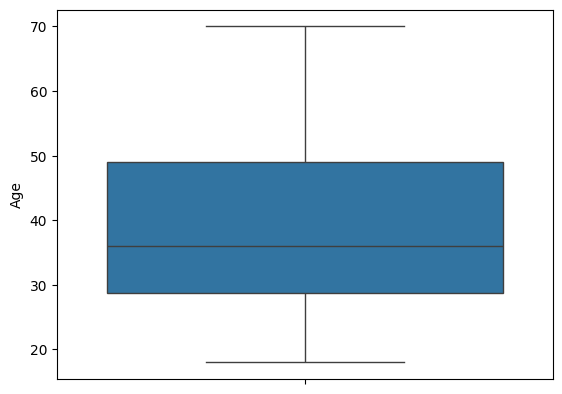

In [10]:
import seaborn as sns

sns.boxplot(df['Age'])

<Axes: >

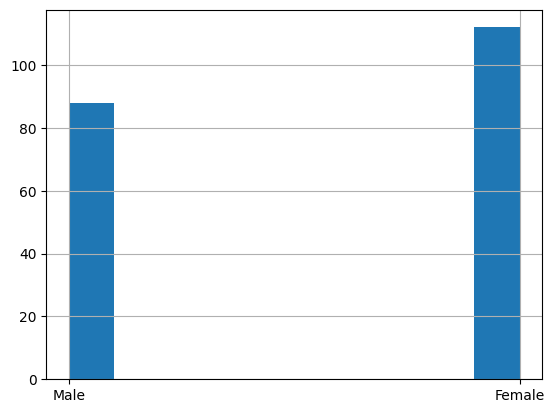

In [11]:

df['Gender'].hist()

<Axes: ylabel='Gender'>

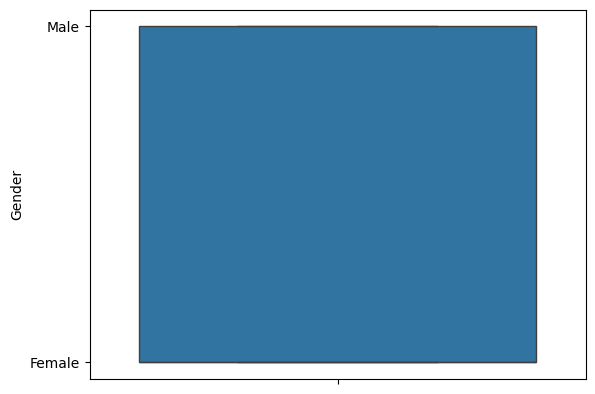

In [12]:
sns.boxplot(df['Gender'])

<Axes: >

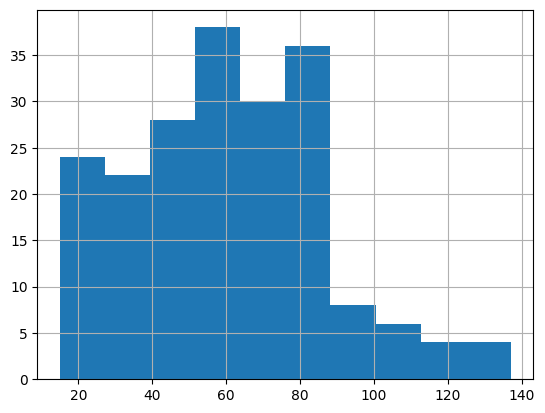

In [13]:
df['Annual Income (k$)'].hist()

<Axes: ylabel='Annual Income (k$)'>

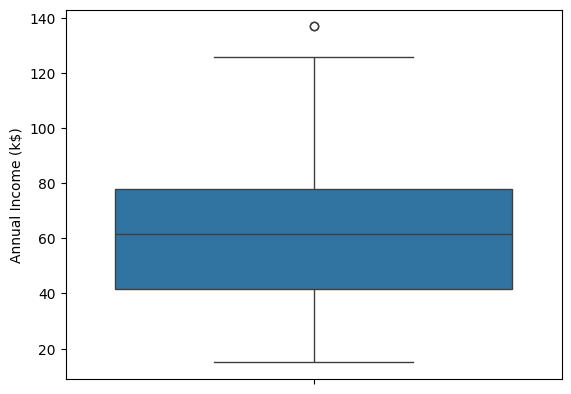

In [14]:
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

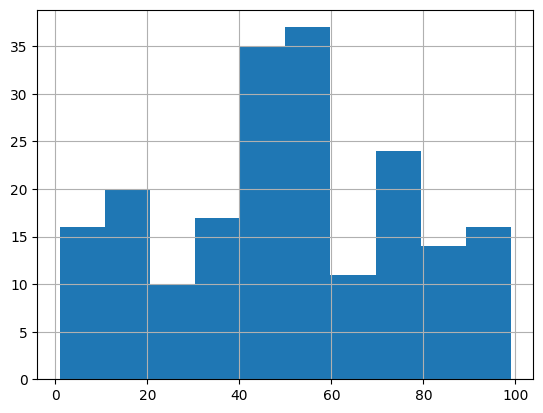

In [15]:
df['Spending Score (1-100)'].hist()

<Axes: ylabel='Spending Score (1-100)'>

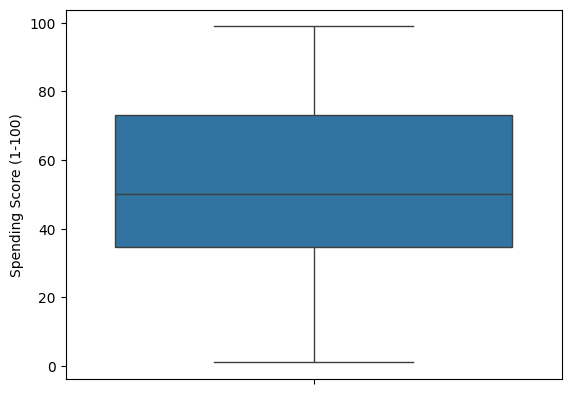

In [16]:
sns.boxplot(df['Spending Score (1-100)'])

Matrice de correlation

In [17]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


### EDA mutlivariée

Scatter plot de la relation entre age et revenue annuel.

On peut voir que ...

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

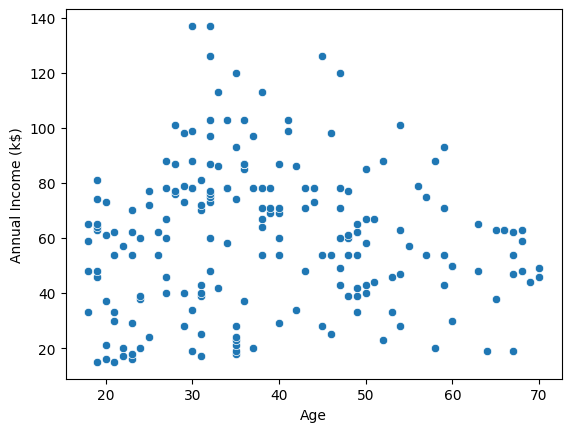

In [18]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df)

Scatter plot de la relation entre age et score de depense.

On peut voir que plus l'age est petit plus le score de depense est élevé.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

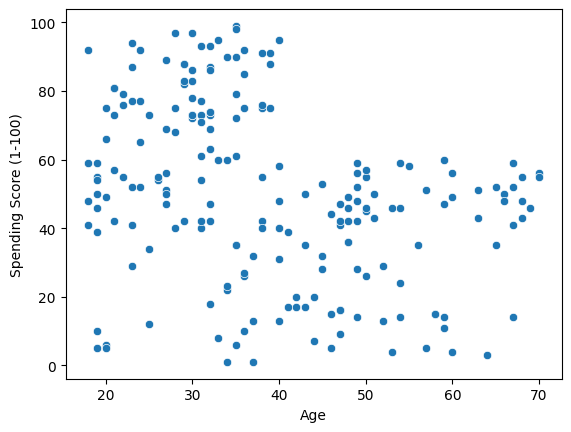

In [19]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)

Scatter plot de la relation entre revenue annuel et score de depense.

On peut voir que plus l'age est petit plus le score de depense est élevé.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

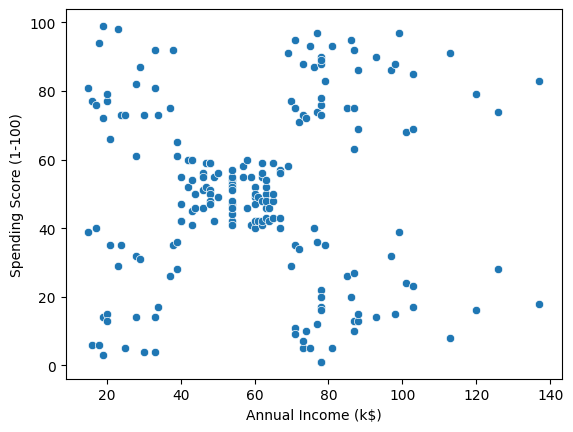

In [20]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

## Feature engineering

La colonne `CustomerID` a été supprimer pendant la nettoyage des données parce qu'elle n'est d'aucunne utilitée.

Creation de classe d'ages

In [37]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young', 'Adult', 'Senior'])
df['Age Group'].value_counts()

Age Group
Young     94
Adult     85
Senior    17
Child      4
Name: count, dtype: int64